In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import probplot

In [50]:
df = pd.read_csv('../../datasets/teen_phone_addiction_dataset.csv')
data = df['Daily_Usage_Hours']

In [51]:
print(len(data))

3000


In [52]:
print(data.isna().sum())

0


In [53]:
print("Среднее значение", data.mean())
print("Дисперсия", data.var())
print("Мода", data.mode()[0] if not data.mode().empty else np.nan)
print("Медиана", data.median())
quantilies = data.quantile([0.25, 0.5, 0.75])
print("Квантили", quantilies.values)
print("Эксцесс",stats.kurtosis(data, bias=False))
print("Ассиметрия", stats.skew(data, bias=False))
print("Интерквартильный размах", quantilies[0.75] - quantilies[0.25])

Среднее значение 5.020666666666667
Дисперсия 3.827895520729132
Мода 4.4
Медиана 5.0
Квантили [3.7 5.  6.4]
Эксцесс -0.12081610863833259
Ассиметрия 0.016205396823206885
Интерквартильный размах 2.7


Среденее, мода и медиана приблизительно равны (для достаточно большой выборки)
Коэф ассиметрии близок к нулю => распределение близко к симметричному, но имеет небольшую скошенность вправо
Эксцесс лежит в пределах от -0.5 до 3 => распределение близко к нормальному
Половина данных лежит в интервале от 3.7 до 6.4 часов

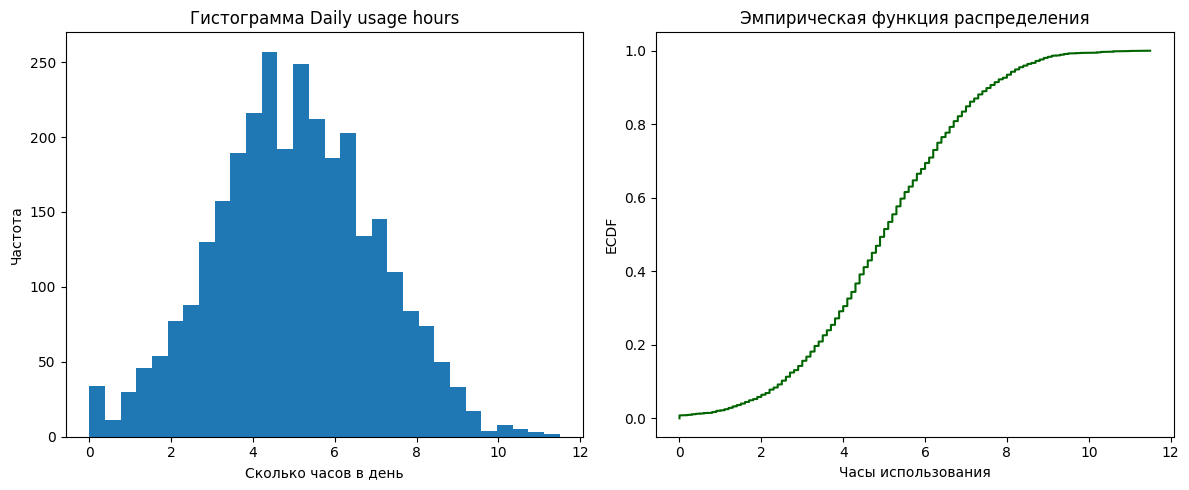

In [54]:
#гистограмма
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(data, bins=30)
plt.title('Гистограмма Daily usage hours')
plt.xlabel('Сколько часов в день')
plt.ylabel('Частота')

#Эмперическая функция распределения
plt.subplot(1, 2, 2)
sorted_data = sorted(data)
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.plot(sorted_data, y, color='darkgreen')
plt.title('Эмпирическая функция распределения')
plt.xlabel('Часы использования')
plt.ylabel('ECDF')

plt.tight_layout()
plt.show()

Критерий хи квадрат

In [55]:
mean = data.mean()
std = np.sqrt(data.var())
n = len(data)

#Разбиваем данные на интервалы
bins = 10
hist, bin_edges = np.histogram(data, bins = bins, density=False)
observed = hist #наблдаемые частоты

# Вычисляем ожидаемые частоты
expected = []
for i in range(len(bin_edges) - 1):
    left = bin_edges[i]
    right = bin_edges[i + 1]
    prob = stats.norm.cdf(right, mean, std) - stats.norm.cdf(left, mean, std)
    expected.append(prob * n)

expected = np.array(expected)

if any(e < 5 for e in expected):
    print("Предупреждение: некоторые ожидаемые частоты < 5, попробуйте увеличить bins или объединить интервалы")

#Статистика хи квадрат
chi_square_stat = np.sum((observed - expected)**2 / expected)
df_chi = len(observed) - 1 - 2
critical_value = stats.chi2.ppf(1 - 0.05, df_chi)

print("Критерий хи-квадрат:")
print(f"Статистика хи-квадрат: {chi_square_stat:.2f}")
print(f"Критическое значение (alpha=0.05, df={df_chi}): {critical_value:.2f}")
if chi_square_stat > critical_value:
    print("Отвергаем гипотезу о нормальности (данные не нормальны)")
else:
    print("Не отвергаем гипотезу о нормальности")


Критерий хи-квадрат:
Статистика хи-квадрат: 16.62
Критическое значение (alpha=0.05, df=7): 14.07
Отвергаем гипотезу о нормальности (данные не нормальны)


Если альфа уменьшить альфа до 0.01, то гипотеза о нормальности отвергаться не будет

Qplot

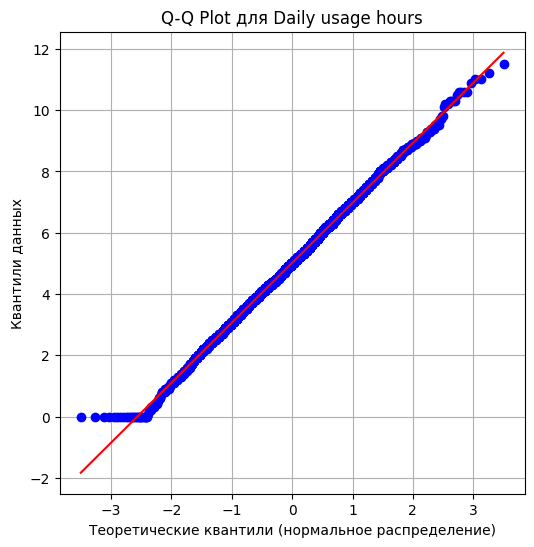

In [56]:
plt.figure(figsize=(6, 6))  # Размер графика
probplot(data, dist='norm', plot=plt)
plt.title('Q-Q Plot для Daily usage hours')
plt.xlabel('Теоретические квантили (нормальное распределение)')
plt.ylabel('Квантили данных')
plt.grid(True)
plt.show()

Приведение данных к нормальному распределению через удаление выбросов

In [57]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
lower_bound = max(0, q1 - 1.5 * iqr)
upper_bound = q3 + 1.5 * iqr
print(f"Количество выбросов: {((data < lower_bound) | (data > upper_bound)).sum()} из {len(data)}")
filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]

Количество выбросов: 10 из 3000


In [58]:
print("Среднее значение", filtered_data.mean())
print("Дисперсия", filtered_data.var())
print("Мода", filtered_data.mode()[0] if not filtered_data.mode().empty else np.nan)
print("Медиана", filtered_data.median())
quantilies_filtered = filtered_data.quantile([0.25, 0.5, 0.75])
print("Квантили", quantilies.values)
print("Эксцесс",stats.kurtosis(filtered_data, bias=False))
print("Ассиметрия", stats.skew(filtered_data, bias=False))
print("Интерквартильный размах", quantilies_filtered[0.75] - quantilies_filtered[0.25])

Среднее значение 5.001170568561873
Дисперсия 3.7263117775209214
Мода 4.4
Медиана 5.0
Квантили [3.7 5.  6.4]
Эксцесс -0.23746777628397808
Ассиметрия -0.04574018031644654
Интерквартильный размах 2.5999999999999996


In [59]:
len(filtered_data)

2990

In [60]:
mean = filtered_data.mean()
std = np.sqrt(filtered_data.var())
n = len(filtered_data)

#Разбиваем данные на интервалы
bins = 10
hist, bin_edges = np.histogram(filtered_data, bins = bins, density=False)
observed = hist #наблдаемые частоты

# Вычисляем ожидаемые частоты
expected = []
for i in range(len(bin_edges) - 1):
    left = bin_edges[i]
    right = bin_edges[i + 1]
    prob = stats.norm.cdf(right, mean, std) - stats.norm.cdf(left, mean, std)
    expected.append(prob * n)

expected = np.array(expected)

if any(e < 5 for e in expected):
    print("Предупреждение: некоторые ожидаемые частоты < 5, попробуйте увеличить bins или объединить интервалы")

#Статистика хи квадрат
chi_square_stat = np.sum((observed - expected)**2 / expected)
df_chi = len(observed) - 1 - 2
critical_value = stats.chi2.ppf(1 - 0.05, df_chi)

print("Критерий хи-квадрат:")
print(f"Статистика хи-квадрат: {chi_square_stat:.2f}")
print(f"Критическое значение (alpha=0.05, df={df_chi}): {critical_value:.2f}")
if chi_square_stat > critical_value:
    print("Отвергаем гипотезу о нормальности (данные не нормальны)")
else:
    print("Не отвергаем гипотезу о нормальности")


Критерий хи-квадрат:
Статистика хи-квадрат: 27.73
Критическое значение (alpha=0.05, df=7): 14.07
Отвергаем гипотезу о нормальности (данные не нормальны)


Удаление выбросов в данном случае не помогло, так как после удаления уменьшился объём выборки. Видимо, наша выборка недостаточно большая, чтобы можно было без потерь удалить 10 элементов.

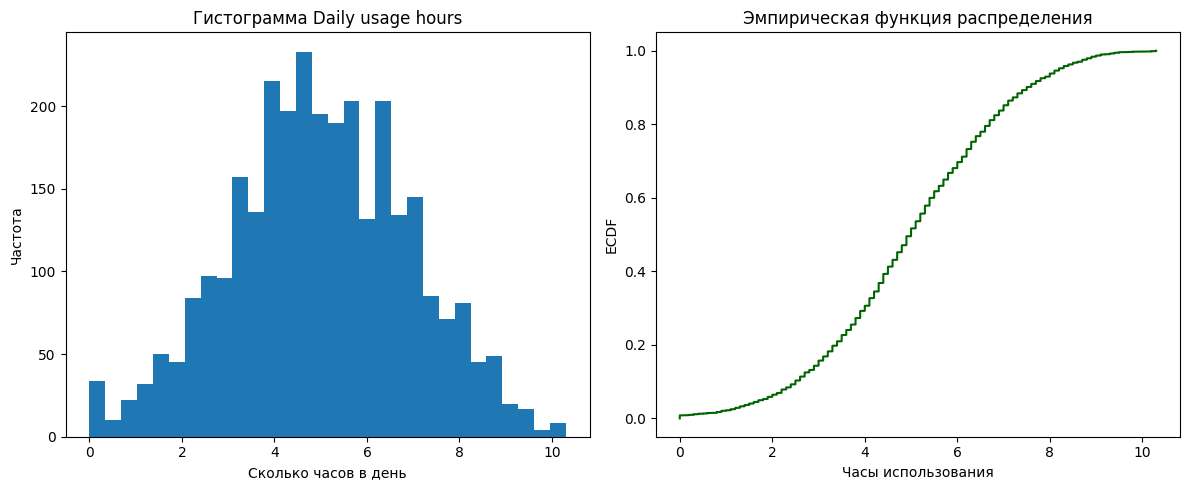

In [61]:
#гистограмма
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(filtered_data, bins=30)
plt.title('Гистограмма Daily usage hours')
plt.xlabel('Сколько часов в день')
plt.ylabel('Частота')

#Эмперическая функция распределения
plt.subplot(1, 2, 2)
sorted_data = sorted(filtered_data)
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.plot(sorted_data, y, color='darkgreen')
plt.title('Эмпирическая функция распределения')
plt.xlabel('Часы использования')
plt.ylabel('ECDF')

plt.tight_layout()
plt.show()

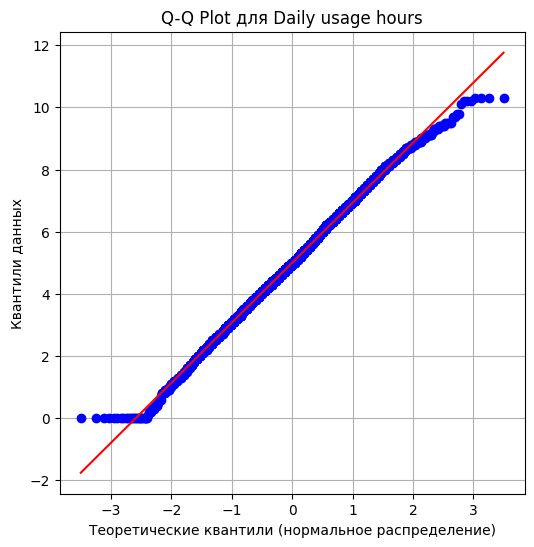

In [62]:
plt.figure(figsize=(6, 6))  # Размер графика
probplot(filtered_data, dist='norm', plot=plt)
plt.title('Q-Q Plot для Daily usage hours')
plt.xlabel('Теоретические квантили (нормальное распределение)')
plt.ylabel('Квантили данных')
plt.grid(True)
plt.show()

Сгруппируйте данные по столбцу 'School_Grade'.<br>

На одном графике постройте гистограммы для каждой группы.<br>
Рассчитайте среднее, дисперсию внутри каждой группы

In [63]:
df['School_Grade'].isna().sum()
grouped = df.groupby('School_Grade')['Daily_Usage_Hours']
stats = grouped.agg(['mean', 'var']).round(2)
print("Среднее и дисперсия по группам:")
print(stats)

Среднее и дисперсия по группам:
              mean   var
School_Grade            
10th          4.98  3.81
11th          5.06  3.64
12th          4.94  3.74
7th           5.08  3.88
8th           5.07  4.01
9th           5.01  3.91


Среднее и дисперсия в каждой группе приблизительно равны

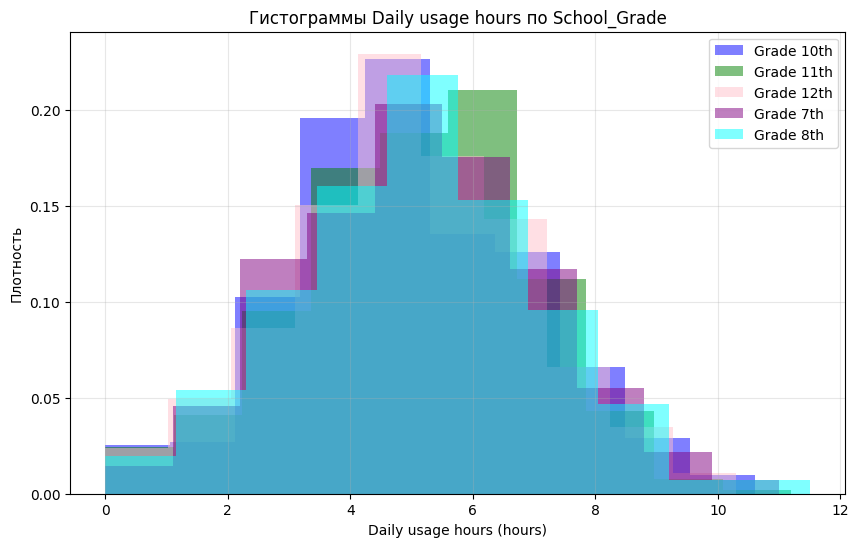

In [64]:
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'pink', 'purple', 'cyan']  # Цвета для разных групп
for (grade, group), color in zip(grouped, colors[:len(grouped)]):
    group.hist(bins=10, alpha=0.5, label=f'Grade {grade}', color=color, density=True)

plt.title('Гистограммы Daily usage hours по School_Grade')
plt.xlabel('Daily usage hours (hours)')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()